In [1]:
import numpy as np
import multiprocessing as mp
import seaborn as sns
import matplotlib.pyplot as plt

from imgaug import augmenters as iaa
from imgaug import parameters as iap

In [2]:
rows = 8
cols = 4

In [3]:
images = np.array(
    [np.zeros((256, 256, 3)) for _ in range(rows * cols)],
    dtype=np.uint8
)

In [4]:
seq = iaa.FrequencyNoiseAlpha(
    exponent=iap.Uniform(-4, 4),
    first=iaa.Add(255),
    size_px_max=32,
    iterations=1,
    sigmoid=True,
    sigmoid_thresh=(-10, 10)
)

In [5]:
images_aug = seq.augment_images(images)

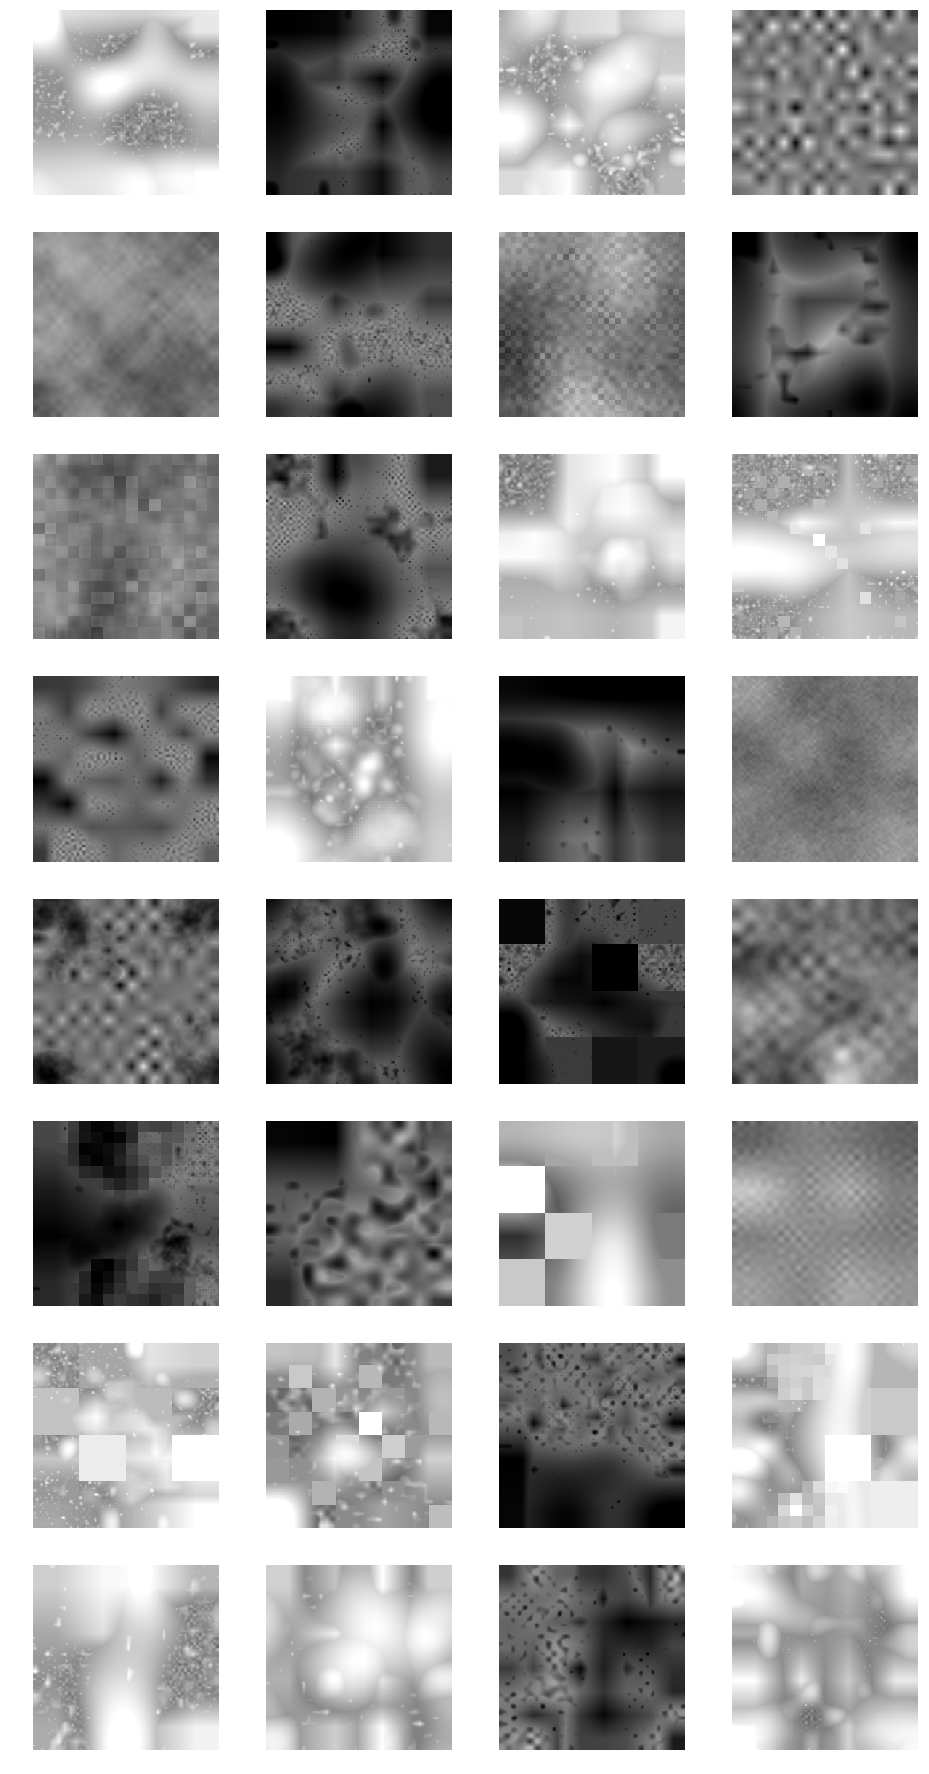

In [6]:
# SimplexNoiseAlpha
# FrequencyNoiseAlpha
seq = iaa.FrequencyNoiseAlpha(
    exponent=iap.Uniform(-5, 5),
    first=iaa.Add(255),
    size_px_max=iap.Choice([64, 32, 16, 8, 4, 2]),
    iterations=iap.DiscreteUniform(1, 10),
    aggregation_method=iap.Choice(['avg', 'min', 'max']),
    sigmoid=True,
    sigmoid_thresh=(-10, 10)
)

images_aug = seq.augment_images(images)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows))
for i in range(rows):
    for j in range(cols):
        axes[i, j].set_axis_off()
        axes[i, j].imshow(images_aug[i * cols + j]);